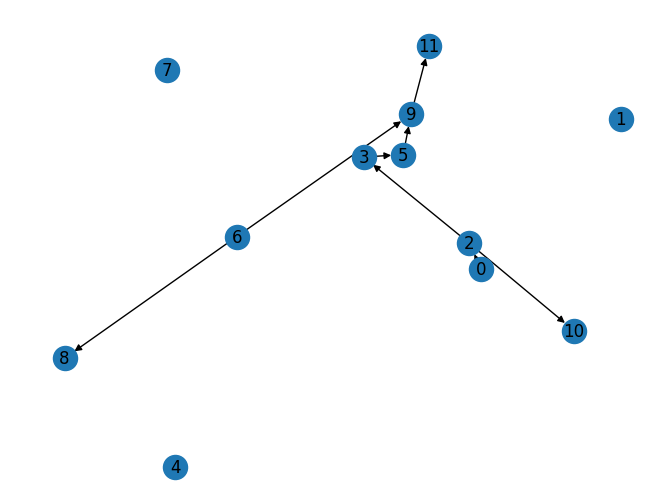

In [6]:
import numpy as np
import numpy.random as rn
import networkx as nx 
import matplotlib.pyplot as plt
from torch import rand, randperm


# Number of clusters for the Bayesian Attack Graph
Nclusters = 4
# Number of nodes per cluster
N = 3
# Total number of nodes in the Bayesian Attack Graph
Ntot = Nclusters * N

# Initialize the adjacency matrix
dag = np.zeros((Ntot, Ntot))

# Maximum number of parents allowed per node in the BAG
max_edges = 3

# Create the adjacency matrix
for j in range(Nclusters):
    dag2 = np.zeros((N, N))
    for i in range(1, N):
        dif = N - 1 - (N - i)
        rd = np.random.randint(1, max_edges + 1)
        aux = np.arange(dif)
        np.random.shuffle(aux)
        dag2[i, aux[:min(rd, len(aux))]] = 1
    dag2 = dag2.T
    dag[N*j:N*(j+1), N*j:N*(j+1)] = dag2
    c1 = np.setdiff1d(np.arange(Ntot), np.arange(N*j, N*(j+1)))
    np.random.shuffle(c1)
    rd = np.random.randint(N*j, N*(j+1))
    if rd > c1[0]:
        dag[c1[0], rd] = 1
    else:
        dag[rd, c1[0]] = 1


G = nx.DiGraph(dag)
layout = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=layout)
plt.show()

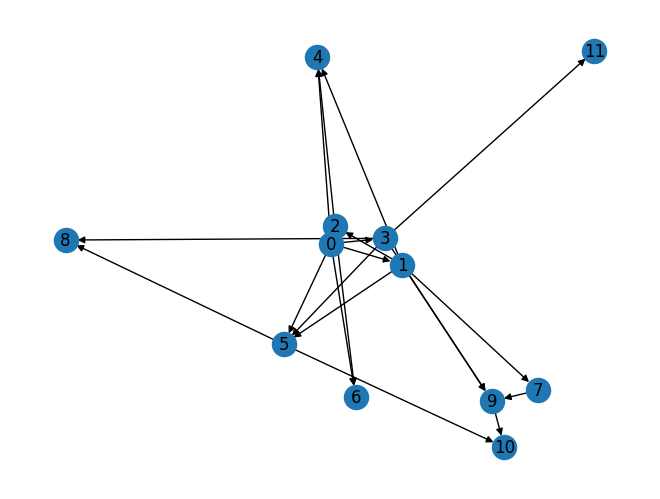

In [7]:
def CreateBAG(N, max_edges):
    """
    Create the adjacency matrix (at random, limiting the number of parents per node to max_edges)
    
    # Visualisation purposes
    # i   dif  aux 
    # 2   1   [1]
    # 3   2   [1,2]
    # 4   3   [1,2,3]
    # 5   4   [1,2,3,4]

    params:
    N: Number of nodes in the Bayesian Attack Graph
    max_edges: Maximum number of parents allowed per node in the Bayesian Attack Graph
    """
    
    # Initialise adjacency matrix
    DAG = np.zeros([N, N], dtype=int)

    for i in range(1, N):
        # Uniformly sample number of parents for each node
        parents = rn.randint(1, max_edges+1)
        # Enumerate all of the parent indices 0 to node-1
        aux = np.arange(0, i) 
        # Shuffle parent indices
        rn.shuffle(aux)
        # Take first min(parents, len(aux)) indices to be parents
        ind = aux[:min(parents, len(aux))]
        # Set entries in adjacency matrix
        DAG[ind, i] = 1

    return DAG

DAG = CreateBAG(Ntot, max_edges)
G = nx.DiGraph(DAG)
layout = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=layout)
plt.show()